In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
sns.set(style="whitegrid")

In [6]:
import pandas as pd
df = pd.read_csv("C:/Users/hp5cd/Downloads/ner_dataset.csv", encoding='latin1')
print(df.head())


    Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O


In [7]:
print("First 5 rows:\n", df.head())

First 5 rows:
     Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O


In [8]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048565 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB
None


In [9]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64


In [13]:
print(df.isnull().sum()) 


Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64


In [14]:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
              Sentence #     Word      POS      Tag
count           1048575  1048575  1048575  1048575
unique            47959    35177       42       17
top     Sentence: 22480      the       NN        O
freq                104    52573   145807   887908


In [15]:
print("\nTag distribution:\n", df['Tag'].value_counts())
print("\nPOS distribution:\n", df['POS'].value_counts())


Tag distribution:
 Tag
O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: count, dtype: int64

POS distribution:
 POS
NN      145807
NNP     131426
IN      120996
DT       98454
JJ       78412
NNS      75840
.        47831
VBD      39379
,        32757
VBN      32328
VBZ      24960
CD       24695
VB       24211
CC       23716
TO       23061
RB       20252
VBG      19125
VBP      16158
PRP      13318
POS      11257
PRP$      8655
MD        6973
``        3728
WDT       3698
JJS       3034
JJR       2967
WP        2542
NNPS      2521
RP        2490
WRB       2184
$         1149
RBR       1055
:          795
RRB        679
LRB        678
EX         663
RBS        296
;          214
PDT        147
WP$         99
UH          24
FW           1
Name: count, dtype: int6

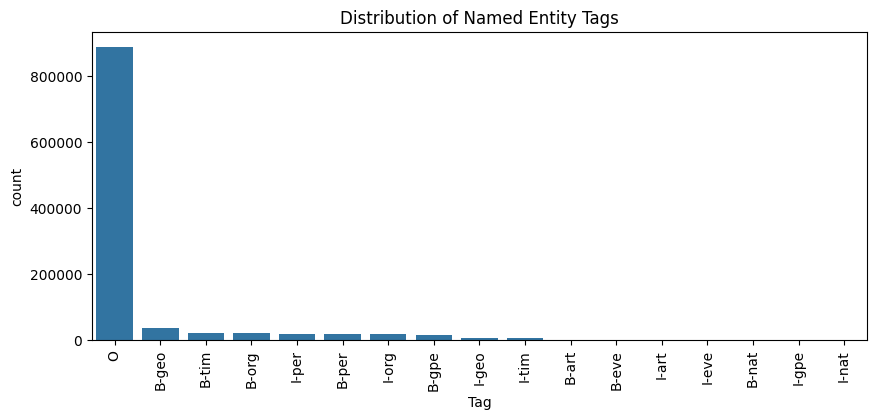

In [16]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Tag', order=df['Tag'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Named Entity Tags')
plt.show()

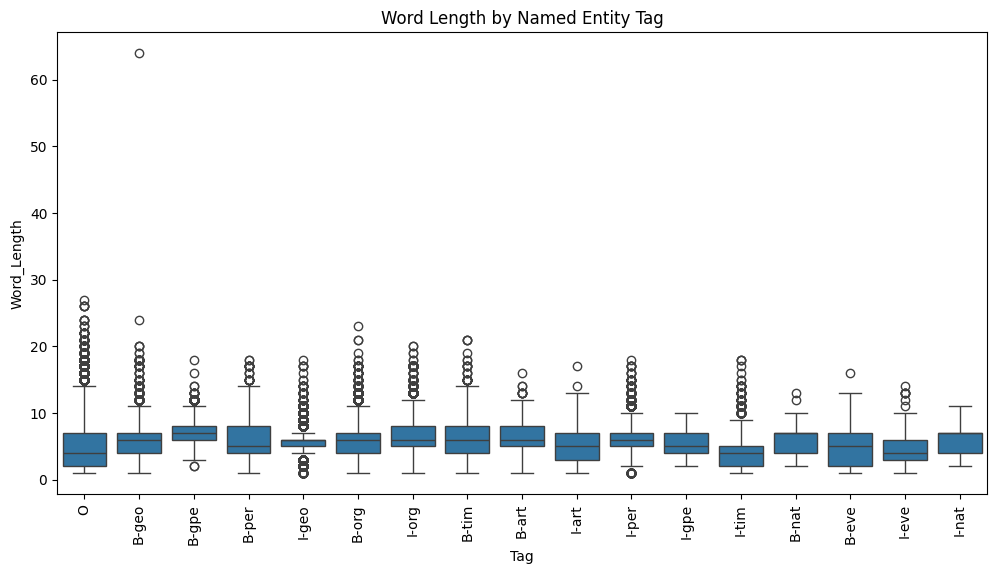

In [17]:
df['Word_Length'] = df['Word'].astype(str).apply(len)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tag', y='Word_Length', data=df)
plt.xticks(rotation=90)
plt.title("Word Length by Named Entity Tag")
plt.show()

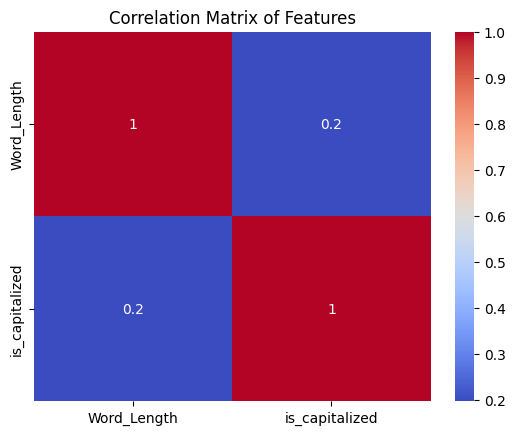

In [18]:
df['is_capitalized'] = df['Word'].apply(lambda x: str(x)[0].isupper())
df['is_capitalized'] = df['is_capitalized'].astype(int)

corr = df[['Word_Length', 'is_capitalized']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
sns.pairplot(df[['Word_Length', 'is_capitalized', 'Tag']], hue='Tag', corner=True)
plt.show()

In [21]:
tag_counts = df['Tag'].value_counts(normalize=True) * 100
print("\nTag Proportions (%):\n", tag_counts)



Tag Proportions (%):
 Tag
O        84.677586
B-geo     3.590015
B-tim     1.939108
B-org     1.920988
I-per     1.645185
B-per     1.620294
I-org     1.600648
B-gpe     1.513483
I-geo     0.707055
I-tim     0.622559
B-art     0.038338
B-eve     0.029373
I-art     0.028324
I-eve     0.024128
B-nat     0.019169
I-gpe     0.018883
I-nat     0.004864
Name: proportion, dtype: float64


In [22]:
print("\nSkewness:\n", df[['Word_Length']].skew())



Skewness:
 Word_Length    0.727863
dtype: float64
